<a href="https://colab.research.google.com/github/robertoarturomc/ProgramacionConcurrente/blob/main/4_Reto_Modelado_Estadistico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Reto Modelación Estadística
## 4. Estadística

In [38]:
install.packages("statsr")
install.packages("nortest")
library(statsr)
library(nortest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘elliptic’, ‘contfrac’, ‘deSolve’, ‘coda’, ‘pbapply’, ‘mvtnorm’, ‘MatrixModels’, ‘hypergeo’, ‘RcppEigen’, ‘BayesFactor’, ‘gridExtra’, ‘cubature’


Warning message in install.packages("statsr"):
“installation of package ‘BayesFactor’ had non-zero exit status”
Warning message in install.packages("statsr"):
“installation of package ‘statsr’ had non-zero exit status”


ERROR: Error in library(statsr): there is no package called ‘statsr’


In [8]:
df <- read.csv("Customer-Churn-Records.csv")
head(df)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction.Score,Card.Type,Point.Earned
,<int>,<int>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<chr>,<int>
1,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
2,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
3,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
4,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
5,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
6,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484


Podemos calcular distintas Estadísticas sobre distintos grupos. Por ejemplo, calcular el promedio de edad según el Género.

In [9]:
mean_age_male <- mean( df[df$Gender == "Male", "Age"] )
mean_age_male

[1] 38.65824

In [10]:
mean_age_female <- mean( df[df$Gender == "Female", "Age"] )
mean_age_female

[1] 39.23839

O incluso, podemos hacer ese cálculo de manera directa

In [11]:
tapply(df$Age, df$Gender, mean)

Female     Male 
39.23839 38.65824

### Pruebas de Normalidad

¿Recuerdas la Variable _Balance_ y cómo sospechábamos que se distribuía Normal?

¿Y si hacemos una prueba Estadística?

In [13]:
shapiro.test(df$Balance)

ERROR: Error in shapiro.test(df$Balance): sample size must be between 3 and 5000


Parece ser que necesitamos trabajar con menos datos. Saquemos una muestra...

In [14]:
sample_balance <- df[sample(1:nrow(df), size=50, replace=FALSE), "Balance"]

Ahora sí, apliquemos la Prueba de Normalidad de Shapiro-Wilk.

In [15]:
shapiro.test(sample_balance)


	Shapiro-Wilk normality test

data:  sample_balance
W = 0.82831, p-value = 4.205e-06


El valor p es muy, muy pequeño. Es menor que cualquier alfa "típico" (0.1, 0.05 o 0.01). Por lo tanto, rechazamos la Hipótesis Nula $H_0$ y, por lo tanto, no podemos asegurar que nuestra muestra de los datos de _Balance_ provengan de una variable con Distribución Normal.

Pero, ¿recuerdas qué pasaba con esa variable?

¿Qué tal que aplicamos un filtro?

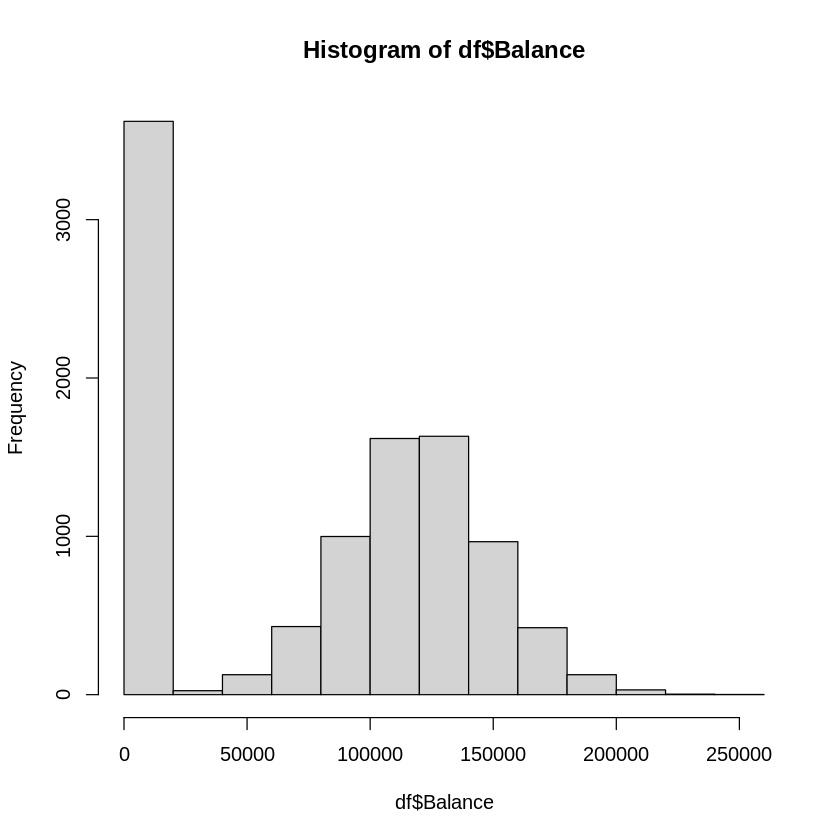

In [16]:
hist(df$Balance)

In [17]:
balance_positivo <-  df[df$Balance > 0, ]

sample_balance <- df[sample(1:nrow(balance_positivo), size=5, replace=FALSE), "Balance"]

shapiro.test(sample_balance)


	Shapiro-Wilk normality test

data:  sample_balance
W = 0.95535, p-value = 0.7753


Para una muestra de 5, y dependiendo el Alfa que usemos, podríamos no descartar la posibilidad de que los datos provengan de una Variable con Distribución Normal.

### Comparar Estadísticas entre dos Grupos

Podemos usar un BoxPlot para comparar medias, varianzas o proporciones entre distintos grupos.

In [18]:
library(ggplot2)

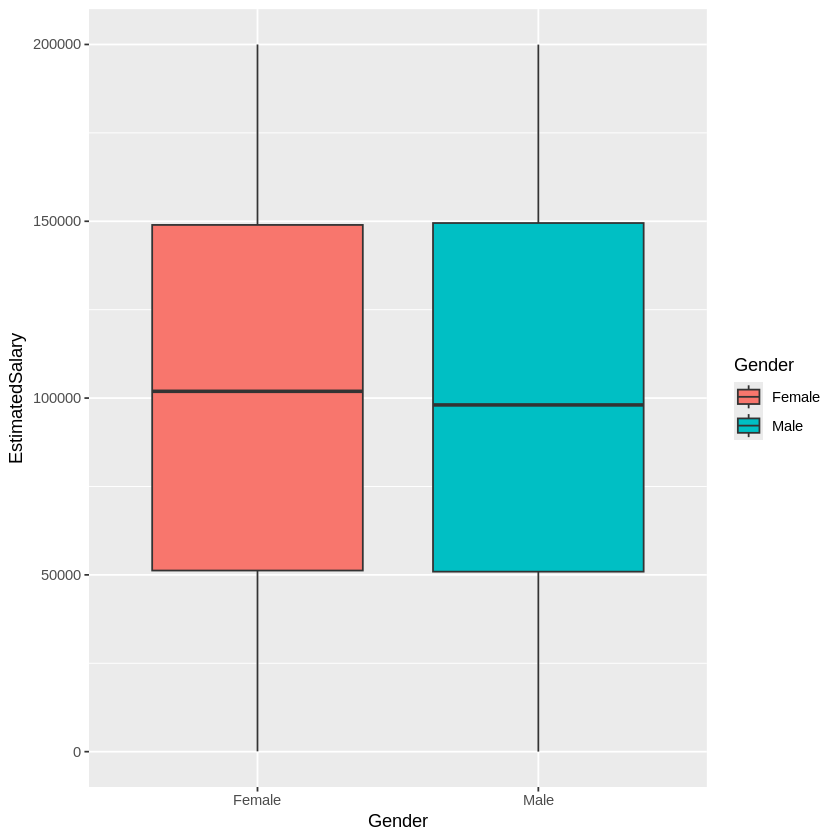

In [19]:
ggplot(df, aes(Gender, EstimatedSalary, fill=Gender)) + geom_boxplot()

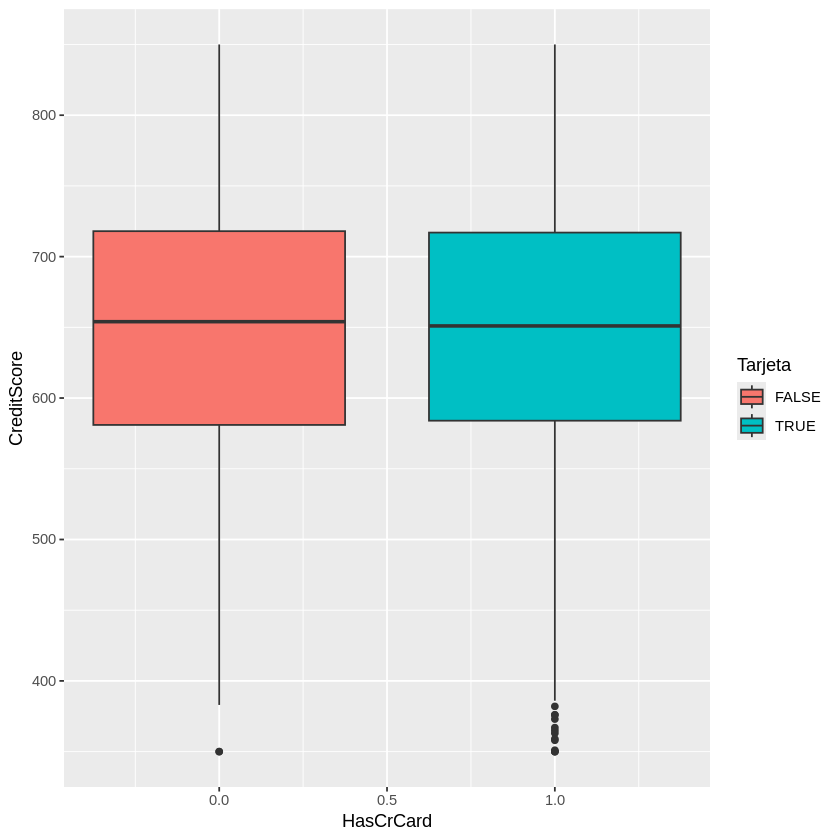

In [20]:
df["Tarjeta"] <- df$HasCrCard == 1
ggplot(df, aes(HasCrCard, CreditScore, fill=Tarjeta)) + geom_boxplot()

Pero, lo más "Formal" sería ocupar una Prueba Estadística para medir la diferencia de medias, varianzas o proporciones entre distintos grupos.

Primero, agreguemos una Prueba de Igualdad de Varianzas, para ver si ambos grupos tienen varianza similar.



In [21]:
var.test(Age~Gender, data= df)


	F test to compare two variances

data:  Age by Gender
F = 1.0372, num df = 4542, denom df = 5456, p-value = 0.1975
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.9811321 1.0967096
sample estimates:
ratio of variances 
          1.037238 


Como el valor p es mayor al alfa "típico" de 0.05, no rechazamos la Hipótesis Nula, y podemos asumir que las varianzas pueden ser iguales.

Ahora sí, apliquemos una Prueba T para la Igualdad de Medias. Como no rechazamos la Hipótesis Nula en el ejercicio anterior, especificamos que ambas varianzas son similares.

In [22]:
t.test(Age~Gender, data= df, var.equal = T)


	Two Sample t-test

data:  Age by Gender
t = 2.7552, df = 9998, p-value = 0.005877
alternative hypothesis: true difference in means between group Female and group Male is not equal to 0
95 percent confidence interval:
 0.1673951 0.9929081
sample estimates:
mean in group Female   mean in group Male 
            39.23839             38.65824 


Como el valor p es menor a un alfa de 0.05, rechazo $H_0$ y acepto $H_a$; por lo tanto, el promedio de edad en ambos grupos (Female y Male) es distinto.

### Pruebas Chi Cuadrada para diferencia de Frecuencias.

Nota como son similares estas dos formas de utilizar el código para hacer Tablas de Frecuencia:

In [25]:
with(df, table(Gender, Tenure))

        Tenure
Gender     0   1   2   3   4   5   6   7   8   9  10
  Female 204 478 480 469 442 448 458 464 433 422 245
  Male   209 557 568 540 547 564 509 564 592 562 245

In [26]:
table(df$Gender, df$Tenure)

        
           0   1   2   3   4   5   6   7   8   9  10
  Female 204 478 480 469 442 448 458 464 433 422 245
  Male   209 557 568 540 547 564 509 564 592 562 245

In [27]:
chisq.test(table(df$Gender, df$Tenure))


	Pearson's Chi-squared test

data:  table(df$Gender, df$Tenure)
X-squared = 16.519, df = 10, p-value = 0.08571


Puesto que el p-value es mayor a un alfa de 0.05, no tenemos argumentos para rechazar nuestra $H_0$. Por lo tanto, concluimos que para Female, como para Male, las diferencias entre las frecuencias de los distintos valores de Tenure **no** son significativas. Es decir, que vendrían de la misma distribución.

### Prueba Fisher cuando no tenemos suficiente información

In [40]:
df["scoreGreater400"] <- df["CreditScore"] > 400

table(df$HasCrCard, df$scoreGreater400)

   
    FALSE TRUE
  0     3 2942
  1    16 7039

In [41]:
fisher.test(as.matrix(table(df$HasCrCard, df$scoreGreater400)))


	Fisher's Exact Test for Count Data

data:  as.matrix(table(df$HasCrCard, df$scoreGreater400))
p-value = 0.3119
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.08370721 1.56907041
sample estimates:
odds ratio 
 0.4486403 


Puesto que el p-value es mayor a un alfa de 0.05, no tenemos argumentos para rechazar nuestra $H_0$. Por lo tanto, concluimos que, independientemente de si tiene Tarjeta de Crédito o no, las diferencias entre las frecuencias de los clientes con Score menor a 400 **no** son significativas. Es decir, que vendrían de la misma distribución.

### Correlación y Covarianza entre dos variables

In [42]:
# Correlación de Pearson
cor(df$Balance, df$EstimatedSalary)

[1] 0.0127975

In [44]:
# Correlación de Spearman
cor(df$Balance, df$EstimatedSalary, method="spearman")

[1] 0.011778

In [43]:
cov(df$Balance, df$EstimatedSalary)

[1] 45923886

### Anova

In [45]:
anova <- aov(Balance~Geography, data=df)

summary(anova)


              Df    Sum Sq   Mean Sq F value Pr(>F)    
Geography      2 6.264e+12 3.132e+12   958.4 <2e-16 ***
Residuals   9997 3.267e+13 3.268e+09                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Como el valor p es muy pequeño, rechazamos $H_0$ y aceptamos la Hipótesis Alternativa.

¿Cuál sería la interpretación?

El Balance promedio para al menos uno de los grupos es distinto al de los demás.

Y eso queda mucho más claro si graficamos:

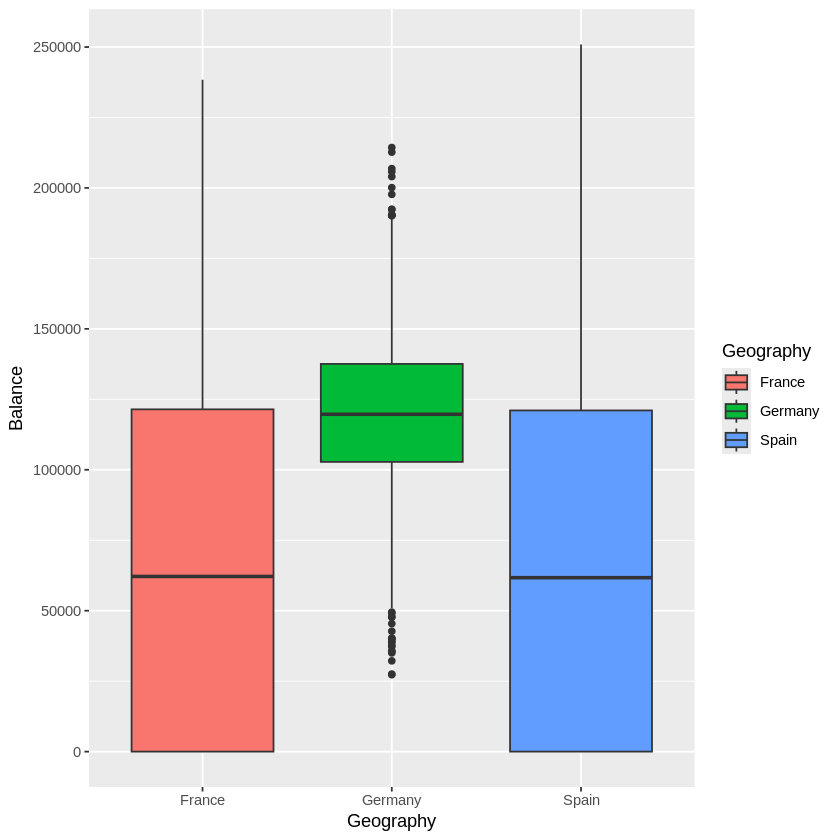

In [46]:
ggplot(df, aes(Geography, Balance, fill=Geography)) + geom_boxplot()